### packages

In [3]:
########################################################################################################
########################################################################################################


from MADDPG import MADDPG

########################################################################################################
########################################################################################################


import os

import numpy as np

########################################################################################################
########################################################################################################


import torch

########################################################################################################
########################################################################################################

import matplotlib.pyplot as plt 

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

########################################################################################################
########################################################################################################

from Environment import Environment


### load the environment

In [4]:
########################################################################################################
########################################################################################################

env=Environment()

obs = env.reset()

########################################################################################################
########################################################################################################

obs_dim_list=[len(o) for o in obs]

########################################################################################################
########################################################################################################

act_dim_list=[2 for o in obs]

########################################################################################################
########################################################################################################

res_dir="./result"

########################################################################################################
########################################################################################################


### maddpg algorithm

In [6]:
########################################################################################################
########################################################################################################
########################################################################################################
########################################################################################################

class argparse(object):
    
    buffer_capacity=int(1e6)
    
    actor_lr=1e-2
    
    critic_lr=1e-2
    
    episode_num=30000
    
    steps_before_learn=2000
    
    batch_size=1024
    
    gamma=.95
    
    tau=.02
    
    episode_length=25
    
    learn_interval=100
    
    save_interval=100
    
args=argparse()

########################################################################################################
########################################################################################################

maddpg = MADDPG(obs_dim_list, act_dim_list, args.buffer_capacity, args.actor_lr, args.critic_lr, res_dir)

########################################################################################################
########################################################################################################

data = torch.load(res_dir+"/model.pt")

for agent, actor_parameter in zip(maddpg.agents, data):
    
    agent.actor.load_state_dict(actor_parameter)
    
print('MADDPG load model.pt')


training on device: cpu
MADDPG load model.pt


### training

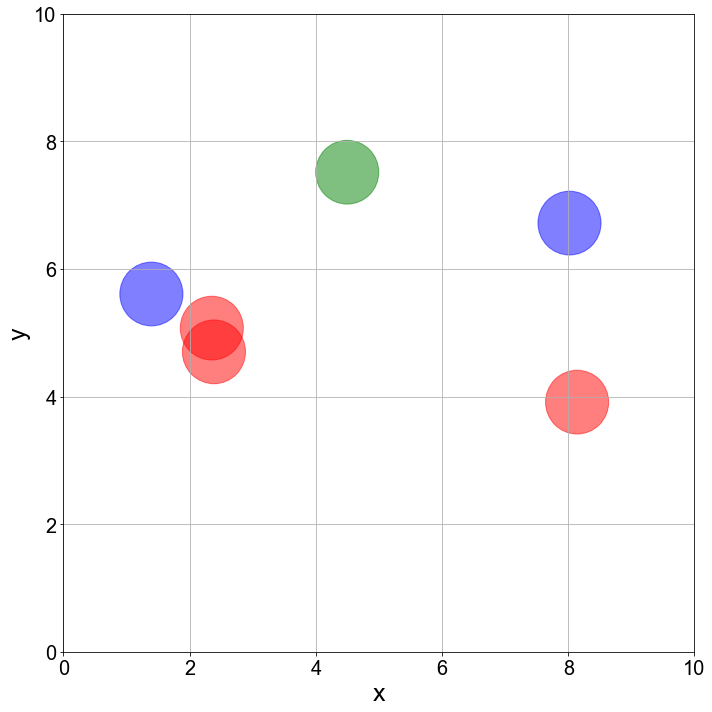

In [7]:

obs = env.reset()


for step in range(args.episode_length):  # interact with the env for an episode

    actions = maddpg.select_action(obs)

    ########################################################################################################

    actual_actions=list()

    for i in range(len(env.agents)):

        action=actions[i]

        velocity=env.agents[i].velocity*action[0]

        theta=2*np.pi**action[1]

        actual_actions.append((velocity,theta))

    ########################################################################################################

    next_obs, rewards, dones , _ = env.step(actual_actions)
    
    env.render()# show

    obs = next_obs



